<a href="https://colab.research.google.com/github/NoPParkGGame/MyFirstMachineLearning/blob/main/MultipleR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 농어의 길이, 높이, 두께 사용. 각 각 제곱하고, 특성끼리 곱해서 새로운 특성 추출
# 데이터분석 라이브러리인 판다스(데이터프레임) 사용
# csv 파일 주로 이용. -> 콤마로 이루어진 텍스트 파일
# read_csv() 함수에 주소를 넣으면 읽을 수 있음, head()는 5행 출력 -> to_numpy() 사용하면 넘파이 배열로 바꿀 수 있음


In [2]:
import pandas as pd

perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [5]:
# 사이킷런의 변환기 = 특성 제작, 전처리 하는 클래스
# 변환기는 fit()과 transform() 메서드

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)

# 변환기의 fit 메서드는 타겟 데이터가 필요하지 않음

poly.fit([[2, 3]])

# transform -> 각 특성의 원형, 특성의 제곱, 특성끼리의 곱을 만들어냄
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [6]:
poly = PolynomialFeatures(include_bias=False)

# train input 의 특성 개수를 파악
poly.fit(train_input)

# 특성을 변환
train_poly = poly.transform(train_input)

# 42개의 물고기, 각 9개의 특성 (x가 9차항)
print(train_poly.shape)

(42, 9)


In [7]:
# 각 특성의 정보를 출력
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [8]:
test_poly = poly.transform(test_input)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


In [10]:
# degree = 5 -> 5제곱 특성까지 생성

poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(test_poly.shape)

(42, 55)
(14, 55)


In [11]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 훈련 데이터 샘플의 개수에 비해 특성의 양이 너무 많아 과대적합이 생김

0.9999999999996433
-144.40579436844948


In [12]:
# 각 계수를 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
print(train_scaled[0])

[-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
 -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
 -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
 -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
 -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
 -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
 -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
 -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
 -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
 -0.75143746]


In [13]:
# 선형회귀 모델에 규제를 추가한 모델을 릿지(ridge) 와 라쏘(lasso) 라고 함
# 릿지 -> 계수 제곱을 기준으로 규제 적용
# 라쏘 -> 계수의 절댓값을 기준으로 규제 적용

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


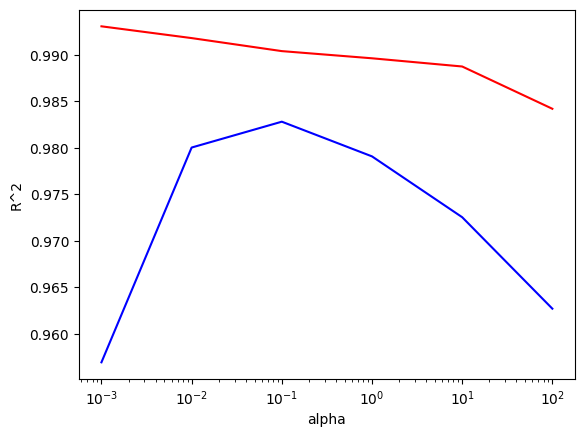

In [14]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:

  ridge = Ridge(alpha=alpha)

  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(alpha_list, train_score, c='red')
plt.plot(alpha_list, test_score, c='blue')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


In [15]:
# alpha 값이 0.1 일 때, 제일 괜찮네

In [17]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


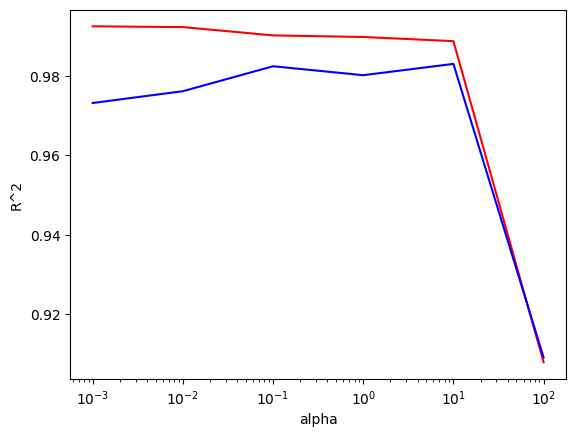

In [19]:
alpha_list = [0.001,0.01,0.1,1,10, 100]

train_score = []
test_score = []


for alpha in alpha_list:

  lasso = Lasso(alpha=alpha, max_iter=10000)

  lasso.fit(train_scaled, train_target)

  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))


plt.plot(alpha_list, train_score, c='red')
plt.plot(alpha_list, test_score, c='blue')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [20]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [21]:
print(np.sum(lasso.coef_ == 0))


40
